# Movie Ppl
## aka The Poach List
### aka The Hit List

In [626]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')

In [627]:
!ls

Dani                         movies_gross_clean.csv
DataClean_Nick.ipynb         peoplefigs
Data_cleaning_marvel.ipynb   profitability_join.ipynb
Nick_movieppl_analysis.ipynb theNumbers_clean.csv
README.md                    twitter_reviews_clean.csv
cleanIMDB                    zippedData
imdb_combined_prof.csv


In [628]:
namekey = pd.read_csv('cleanIMDB/imdb_namekey.csv', index_col=0)

In [629]:
comp = pd.read_csv('imdb_combined_prof.csv', )

In [630]:
comp.head()

,Unnamed: 0,Unnamed: 0_x,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,...,worldwide_gross,ROI %,ROI $,year,month,inflation,worldwide_gross_inf,domestic_gross_inf,production_budget_inf,ROI $ Inf
0,0,20,tt0249516,Foodfight!,Foodfight!,2012,91.0,"['Action', 'Animation', 'Comedy']",1.9,8248.0,...,73706,-0.998362,-44926294,2012,December,1.19,8.771014e+04,0.000000e+00,53550000.0,-5.346229e+07
1,1,54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"['Adventure', 'Comedy', 'Drama']",7.3,275300.0,...,187861183,1.064409,96861183,2013,December,1.17,2.197976e+08,6.813710e+07,106470000.0,1.133276e+08
2,2,58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"['Action', 'Crime', 'Drama']",6.5,105116.0,...,62108587,1.218164,34108587,2014,September,1.15,7.142488e+07,2.992034e+07,32200000.0,3.922488e+07
3,3,60,tt0369610,Jurassic World,Jurassic World,2015,124.0,"['Action', 'Adventure', 'Sci-Fi']",7.0,539338.0,...,1648854864,6.669092,1433854864,2015,June,1.15,1.896183e+09,7.501112e+08,247250000.0,1.648933e+09
4,4,62,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"['Comedy', 'Drama']",6.2,94787.0,...,21544732,-0.521228,-23455268,2011,October,1.21,2.606913e+07,1.586288e+07,54450000.0,-2.838087e+07


In [631]:
# remove unnecessary columns
comp.drop(axis=1, labels=['Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0_y', 'id', 'concat'], inplace=True)

In [632]:
comp.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'directors',
       'writers', 'actor', 'actress', 'archive_footage', 'archive_sound',
       'cinematographer', 'composer', 'director_pr', 'editor', 'producer',
       'production_designer', 'self', 'writer_pr', 'release_date', 'movie',
       'production_budget', 'domestic_gross', 'worldwide_gross', 'ROI %',
       'ROI $', 'year', 'month', 'inflation', 'worldwide_gross_inf',
       'domestic_gross_inf', 'production_budget_inf', 'ROI $ Inf'],
      dtype='object')

In [633]:
comp.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers,...,worldwide_gross,ROI %,ROI $,year,month,inflation,worldwide_gross_inf,domestic_gross_inf,production_budget_inf,ROI $ Inf
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"['Action', 'Animation', 'Comedy']",1.9,8248.0,['nm0440415'],"['nm0440415', 'nm0923312', 'nm0295165', 'nm084...",...,73706,-0.998362,-44926294,2012,December,1.19,8.771014e+04,0.000000e+00,53550000.0,-5.346229e+07
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"['Adventure', 'Comedy', 'Drama']",7.3,275300.0,['nm0001774'],"['nm0175726', 'nm0862122']",...,187861183,1.064409,96861183,2013,December,1.17,2.197976e+08,6.813710e+07,106470000.0,1.133276e+08
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"['Action', 'Crime', 'Drama']",6.5,105116.0,['nm0291082'],"['nm0088747', 'nm0291082']",...,62108587,1.218164,34108587,2014,September,1.15,7.142488e+07,2.992034e+07,32200000.0,3.922488e+07
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"['Action', 'Adventure', 'Sci-Fi']",7.0,539338.0,['nm1119880'],"['nm0415425', 'nm0798646', 'nm1119880', 'nm208...",...,1648854864,6.669092,1433854864,2015,June,1.15,1.896183e+09,7.501112e+08,247250000.0,1.648933e+09
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"['Comedy', 'Drama']",6.2,94787.0,['nm0732430'],"['nm0732430', 'nm0860219']",...,21544732,-0.521228,-23455268,2011,October,1.21,2.606913e+07,1.586288e+07,54450000.0,-2.838087e+07


In [634]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tconst                 1422 non-null   object 
 1   primary_title          1422 non-null   object 
 2   original_title         1422 non-null   object 
 3   start_year             1422 non-null   int64  
 4   runtime_minutes        1408 non-null   float64
 5   genres                 1418 non-null   object 
 6   averagerating          1392 non-null   float64
 7   numvotes               1392 non-null   float64
 8   directors              1417 non-null   object 
 9   writers                1396 non-null   object 
 10  actor                  1355 non-null   object 
 11  actress                1213 non-null   object 
 12  archive_footage        3 non-null      object 
 13  archive_sound          1 non-null      object 
 14  cinematographer        420 non-null    object 
 15  comp

In [635]:
# if possible, convert list-looking strings into actual lists for df.explode()
def lit_try(val):
    try:
        return literal_eval(val)
    except:
        return val

In [636]:
comp.iloc[:,8:22] = comp.iloc[:,8:22].applymap(lit_try)

In [637]:
comp['director'] = comp['directors'] + comp['director_pr']

In [638]:
comp['writer'] = comp['writers'] + comp['writer_pr']

In [639]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tconst                 1422 non-null   object 
 1   primary_title          1422 non-null   object 
 2   original_title         1422 non-null   object 
 3   start_year             1422 non-null   int64  
 4   runtime_minutes        1408 non-null   float64
 5   genres                 1418 non-null   object 
 6   averagerating          1392 non-null   float64
 7   numvotes               1392 non-null   float64
 8   directors              1417 non-null   object 
 9   writers                1396 non-null   object 
 10  actor                  1355 non-null   object 
 11  actress                1213 non-null   object 
 12  archive_footage        3 non-null      object 
 13  archive_sound          1 non-null      object 
 14  cinematographer        420 non-null    object 
 15  comp

In [640]:
comp.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'directors',
       'writers', 'actor', 'actress', 'archive_footage', 'archive_sound',
       'cinematographer', 'composer', 'director_pr', 'editor', 'producer',
       'production_designer', 'self', 'writer_pr', 'release_date', 'movie',
       'production_budget', 'domestic_gross', 'worldwide_gross', 'ROI %',
       'ROI $', 'year', 'month', 'inflation', 'worldwide_gross_inf',
       'domestic_gross_inf', 'production_budget_inf', 'ROI $ Inf', 'director',
       'writer'],
      dtype='object')

Of all the available roles, let's select all but the production designer, archive footage, archive sound, and self

In [641]:
pplorder = ['actor','actress','director','writer','producer','cinematographer','editor','composer']

In [642]:
# create a dictionary of dataframes for all the movie folks
# explode on each person's list, drop the duplicates (director & writer in particular was expected to have dupes)
# group by person, get means of all columns, sort by ROI adjusted for inflation, descending
# append a movie count for each person
# trim dataframes to only include info we need
ppldfdictpre = {}
ppldfdict = {}
for ppl in pplorder:
    ppldfdictpre[ppl] = comp.explode(ppl).drop_duplicates(subset=['tconst','primary_title','start_year',ppl])
    ppldfdict[ppl] = ppldfdictpre[ppl].groupby(ppl).mean()
    ppldfdict[ppl]['ROI_careertot%'] = (ppldfdictpre[ppl].groupby(ppl).sum()['worldwide_gross_inf'] -\
                                     ppldfdictpre[ppl].groupby(ppl).sum()['production_budget_inf']) /\
                                     ppldfdictpre[ppl].groupby(ppl).sum()['production_budget_inf']*100
    ppldfdict[ppl]['movie_count'] = ppldfdictpre[ppl].groupby(ppl).size()
    ppldfdict[ppl]= ppldfdict[ppl].sort_values(by='ROI_careertot%',ascending=False)
    ppldfdict[ppl] = ppldfdict[ppl][['start_year','runtime_minutes','averagerating','numvotes','worldwide_gross_inf',\
                                     'production_budget_inf','ROI_careertot%','movie_count']]

In [643]:
ppldfdict['director'].head(20)

,start_year,runtime_minutes,averagerating,numvotes,worldwide_gross_inf,production_budget_inf,ROI_careertot%,movie_count
director,,,,,,,,
nm4000389,2015.0,81.0,4.20,17763.0,4.790495e+07,115000.0,41556.474000,1
nm3951039,2015.0,81.0,4.20,17763.0,4.790495e+07,115000.0,41556.474000,1
nm0931095,2010.0,91.0,5.70,93122.0,2.218900e+08,3750000.0,5817.067733,1
nm0662086,2012.0,86.0,5.00,60304.0,5.046995e+07,1190000.0,4141.172100,1
nm4318159,2016.0,161.0,8.50,123638.0,3.359063e+08,10830000.0,3001.627558,1
nm7839341,2016.0,90.0,NaN,NaN,1.696394e+08,5700000.0,2876.130200,1
nm8408560,2018.0,92.0,NaN,NaN,1.036888e+08,3815000.0,2617.924114,1
nm8969628,2018.0,92.0,NaN,NaN,1.036888e+08,3815000.0,2617.924114,1
nm1837748,2014.0,126.0,7.70,315135.0,3.532419e+08,13800000.0,2459.723617,1


In [644]:
# now to merge the top people roi dataframe with the name info
ppl_comp = {}
ppl_nums = {}
for ppl in ppldfdict.keys():
    ppl_comp[ppl] = ppldfdict[ppl].merge(namekey, how='left', left_on=ppl, right_on='nconst')
    ppl_nums[ppl] = len(ppl_comp[ppl]) # number of people in each role

In [645]:
type(ppl_comp['director'])

pandas.core.frame.DataFrame

In [646]:
# removing people with only one movie to their name - 'one-hit wonders'
# people with movie_count >= 2
ppl_comp2 = {}
ppl2_nums = {}
for ppl in ppl_comp.keys():
    ppl_comp2[ppl] = ppl_comp[ppl][ppl_comp[ppl]['movie_count'] >= 2]
    ppl2_nums[ppl] = len(ppl_comp2[ppl]) # number of people in each role

In [647]:
# people with movie_count >= 3
ppl_comp3 = {}
ppl3_nums = {}
for ppl in ppl_comp.keys():
    ppl_comp3[ppl] = ppl_comp[ppl][ppl_comp[ppl]['movie_count'] >= 3]
    ppl3_nums[ppl] = len(ppl_comp3[ppl]) # number of people in each role

In [648]:
# averages for movie counts, %ROI
# %ROI both unweighted and weighted with number of movies
ppl_comp_avgs = {}
for ppl in ppl_comp.keys():
    ppl_comp_avgs[f'{ppl}_movie_count'] = ppl_comp[ppl]['movie_count'].mean()
    ppl_comp_avgs[f'{ppl}_%ROI_avg'] = ppl_comp[ppl]['ROI_careertot%'].mean()

In [649]:
ppl_comp2_avgs = {}
for ppl in ppl_comp2.keys():
    ppl_comp2_avgs[f'{ppl}_movie_count'] = ppl_comp2[ppl]['movie_count'].mean()
    ppl_comp2_avgs[f'{ppl}_%ROI_avg'] = ppl_comp2[ppl]['ROI_careertot%'].mean()

In [650]:
ppl_comp3_avgs = {}
for ppl in ppl_comp3.keys():
    ppl_comp3_avgs[f'{ppl}_movie_count'] = ppl_comp3[ppl]['movie_count'].mean()
    ppl_comp3_avgs[f'{ppl}_%ROI_avg'] = ppl_comp3[ppl]['ROI_careertot%'].mean()

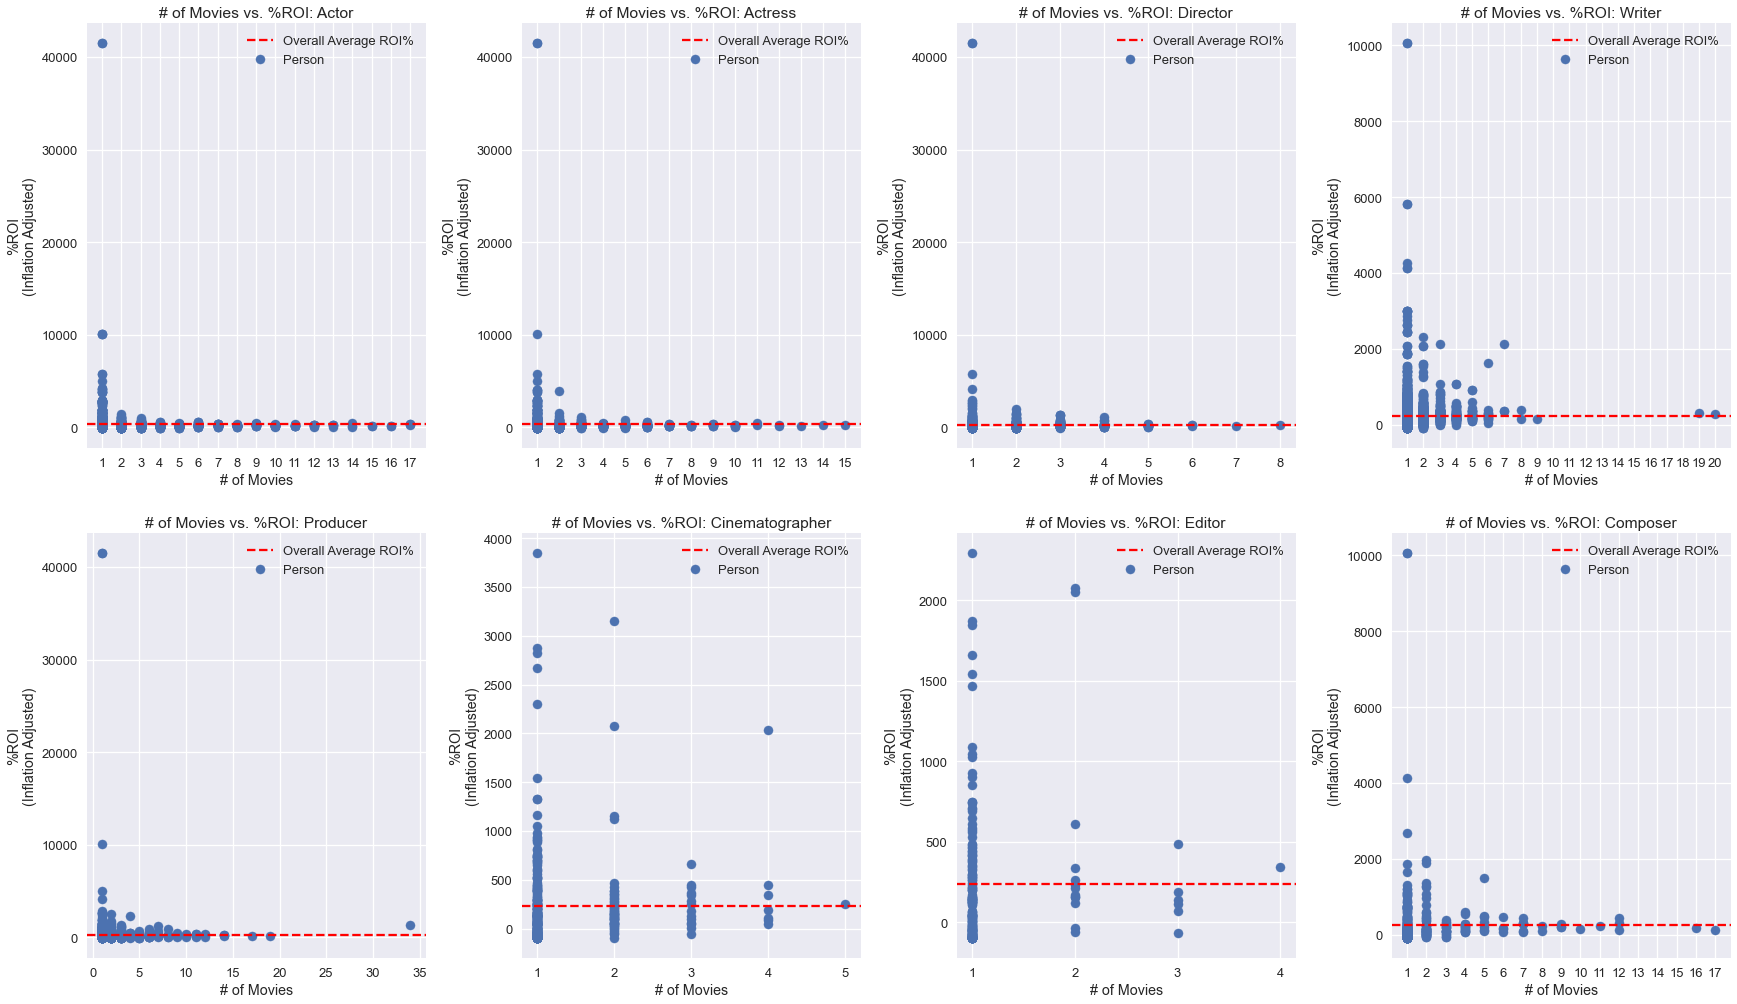

In [651]:
fig, ax = plt.subplots(2, 4, figsize=[25,15])
plt.tight_layout(pad=6)

for i,ppl in enumerate(pplorder):
    r = i//4
    c = i%4
    ax[r,c].scatter(x=ppl_comp[ppl]['movie_count'],y=ppl_comp[ppl]['ROI_careertot%'], label='Person')
    ax[r,c].axhline(ppl_comp_avgs[f'{ppl}_%ROI_avg'], ls='--', color='red', label='Overall Average ROI%')
    ax[r,c].legend(loc='upper right')
    ax[r,c].set_xlabel('# of Movies')
    ax[r,c].set_ylabel('%ROI\n(Inflation Adjusted)')
    ax[r,c].set_title(f'# of Movies vs. %ROI: {ppl.capitalize()}')
    if ppl == 'producer':
        ax[r,c].xaxis.set_major_locator(plt.MultipleLocator(5))
    else:
        ax[r,c].xaxis.set_major_locator(plt.MultipleLocator(1))
plt.savefig('peoplefigs/movie_roi_scatter_allmov.png')

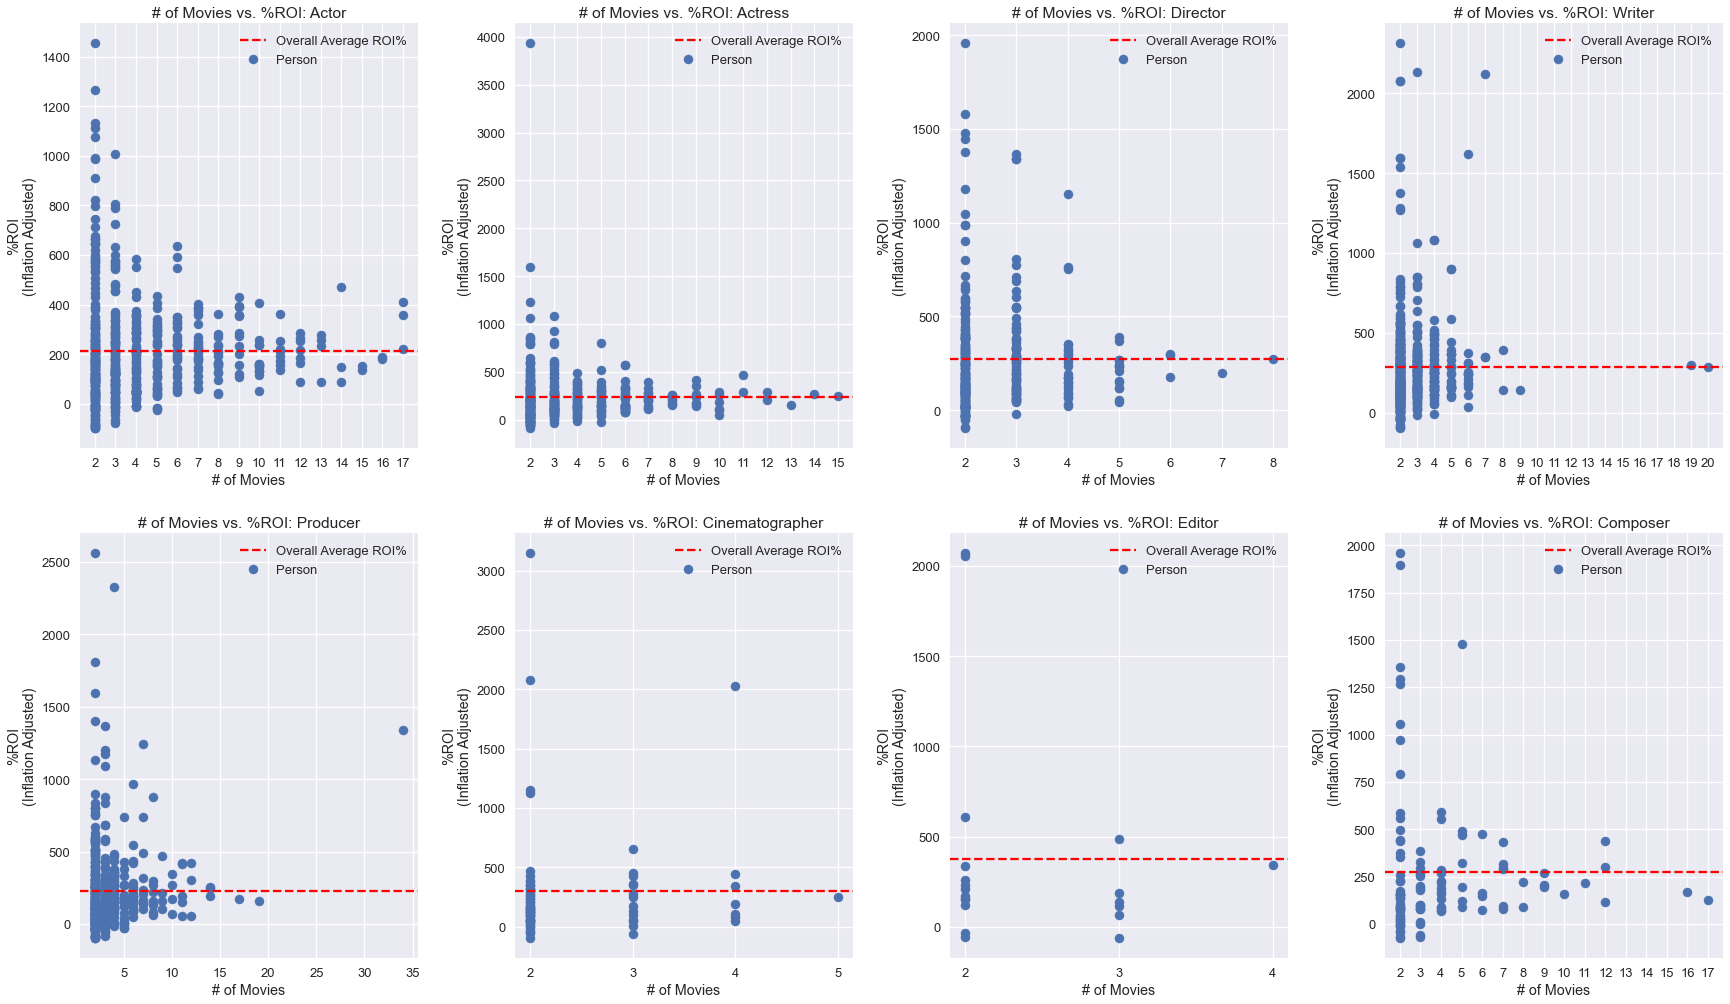

In [652]:
fig, ax = plt.subplots(2, 4, figsize=[25,15])
plt.tight_layout(pad=6)

for i,ppl in enumerate(pplorder):
    r = i//4
    c = i%4
    ax[r,c].scatter(x=ppl_comp2[ppl]['movie_count'],y=ppl_comp2[ppl]['ROI_careertot%'], label='Person')
    ax[r,c].axhline(ppl_comp2_avgs[f'{ppl}_%ROI_avg'], ls='--', color='red', label='Overall Average ROI%')
    ax[r,c].legend(loc='upper right')
    ax[r,c].set_xlabel('# of Movies')
    ax[r,c].set_ylabel('%ROI\n(Inflation Adjusted)')
    ax[r,c].set_title(f'# of Movies vs. %ROI: {ppl.capitalize()}')
    if ppl == 'producer':
        ax[r,c].xaxis.set_major_locator(plt.MultipleLocator(5))
    else:
        ax[r,c].xaxis.set_major_locator(plt.MultipleLocator(1))
plt.savefig('peoplefigs/movie_roi_scatter_2plusmov.png')

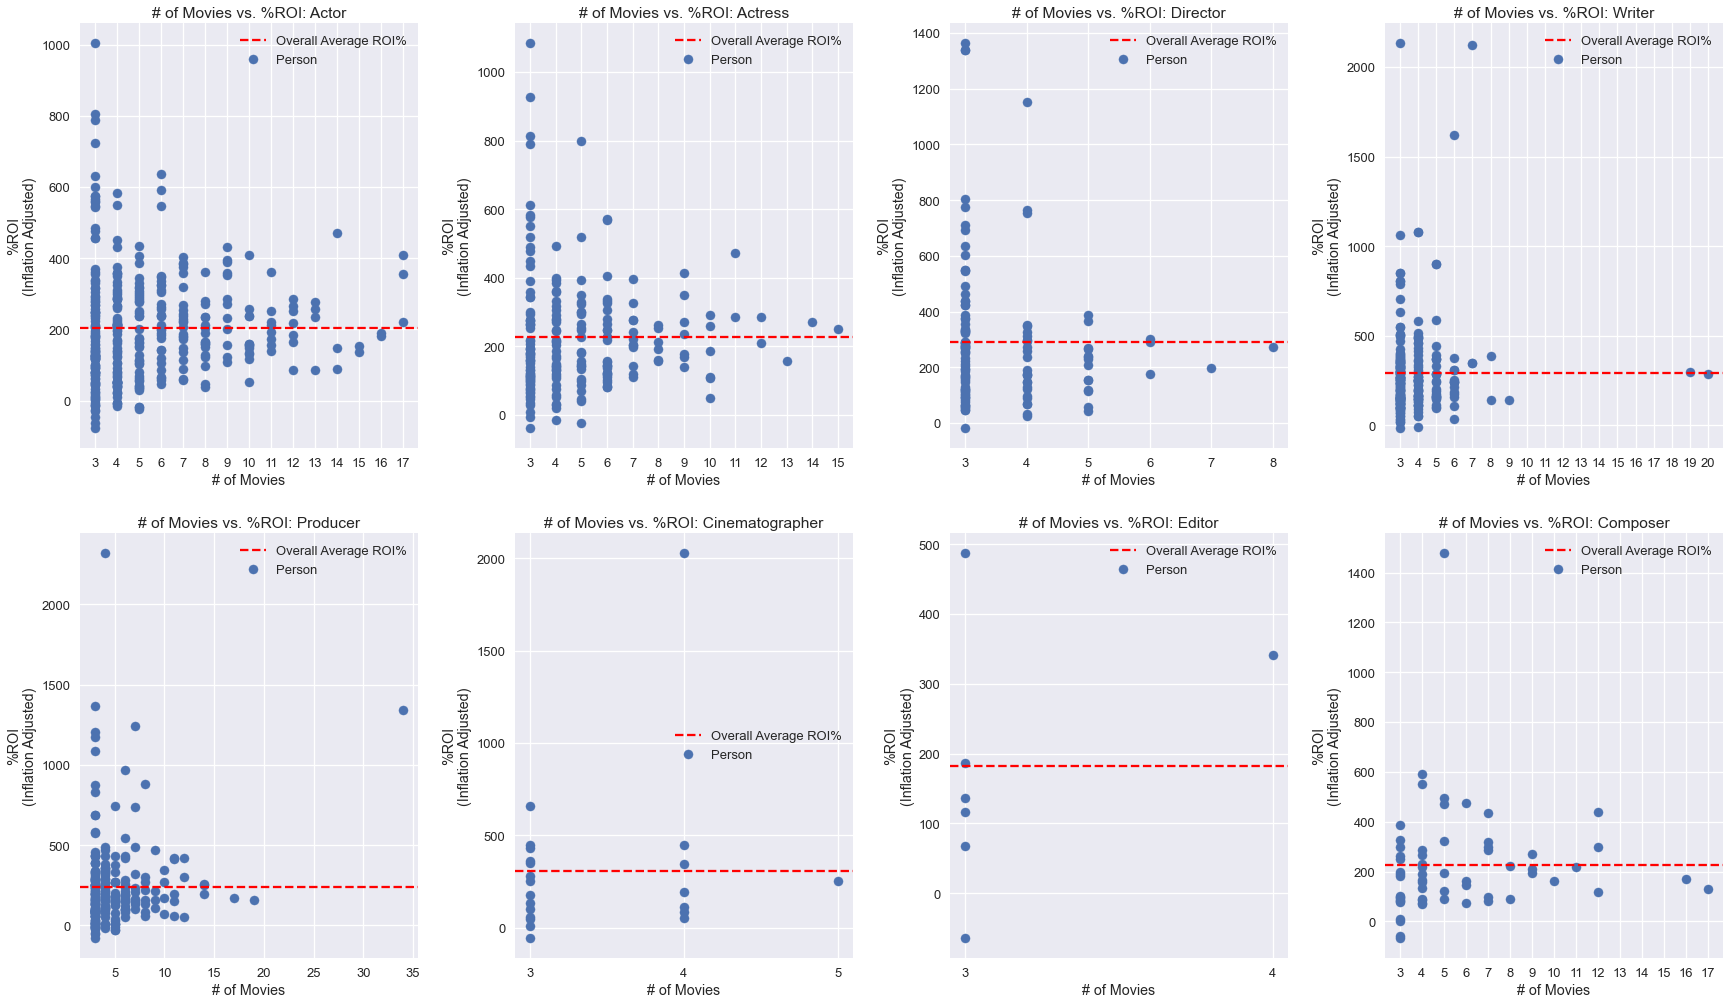

In [653]:
fig, ax = plt.subplots(2, 4, figsize=[25,15])
plt.tight_layout(pad=6)

for i,ppl in enumerate(pplorder):
    r = i//4
    c = i%4
    ax[r,c].scatter(x=ppl_comp3[ppl]['movie_count'],y=ppl_comp3[ppl]['ROI_careertot%'], label='Person')
    ax[r,c].axhline(ppl_comp3_avgs[f'{ppl}_%ROI_avg'], ls='--', color='red', label='Overall Average ROI%')
    ax[r,c].legend()
    ax[r,c].set_xlabel('# of Movies')
    ax[r,c].set_ylabel('%ROI\n(Inflation Adjusted)')
    ax[r,c].set_title(f'# of Movies vs. %ROI: {ppl.capitalize()}')
    if ppl == 'producer':
        ax[r,c].xaxis.set_major_locator(plt.MultipleLocator(5))
    else:
        ax[r,c].xaxis.set_major_locator(plt.MultipleLocator(1))
plt.savefig('peoplefigs/movie_roi_scatter_3plusmov.png')

In [654]:
# grab top 5 names in each position, for the three movie number cutoffs
ppl_compT = {}
ppl_comp2T = {}
ppl_comp3T = {}

for ppl in ppl_comp.keys():
    ppl_compT[ppl] = ppl_comp[ppl].head(5)

for ppl in ppl_comp2.keys():
    ppl_comp2T[ppl] = ppl_comp2[ppl].head(5)

for ppl in ppl_comp3.keys():
    ppl_comp3T[ppl] = ppl_comp3[ppl].head(5)

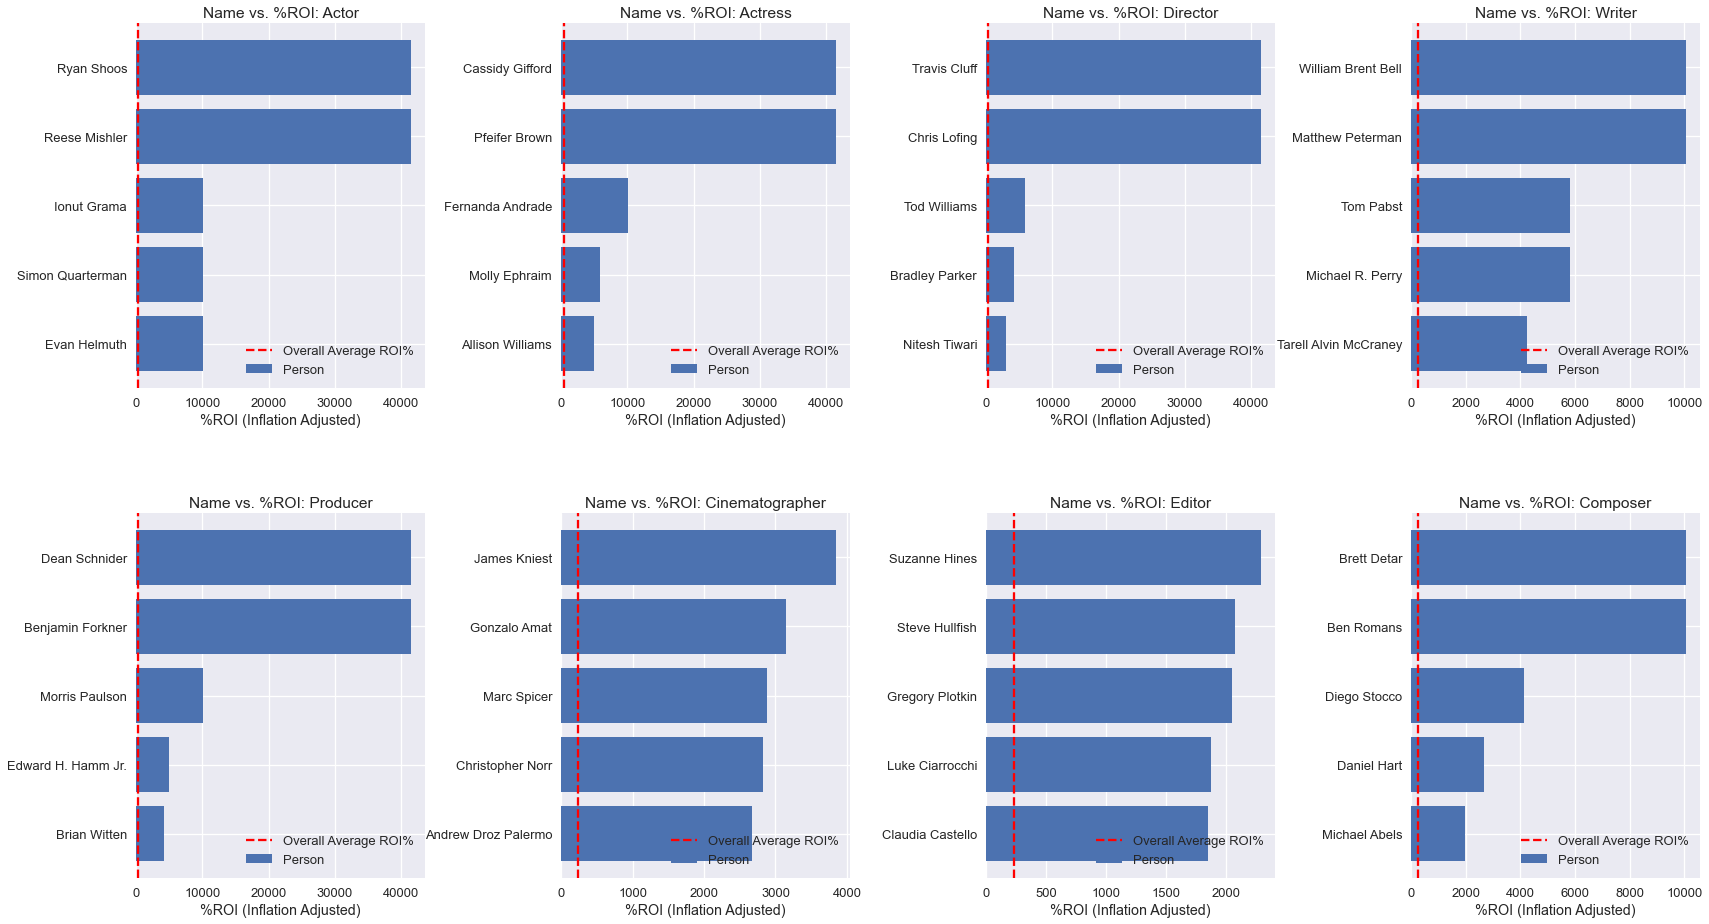

In [656]:
fig, ax = plt.subplots(2, 4, figsize=[25,15])
plt.tight_layout(pad=10)

for i,ppl in enumerate(pplorder):
    r = i//4
    c = i%4
    ax[r,c].barh(y=ppl_compT[ppl]['primary_name'],width=ppl_compT[ppl]['ROI_careertot%'], label='Person')
    ax[r,c].invert_yaxis()
    ax[r,c].axvline(ppl_comp_avgs[f'{ppl}_%ROI_avg'], ls='--', color='red', label='Overall Average ROI%')
    ax[r,c].legend(loc='lower right')
    ax[r,c].set_xlabel('%ROI (Inflation Adjusted)')
    ax[r,c].set_title(f'Name vs. %ROI: {ppl.capitalize()}')
plt.savefig('peoplefigs/name_roi_bar_allmov.png')

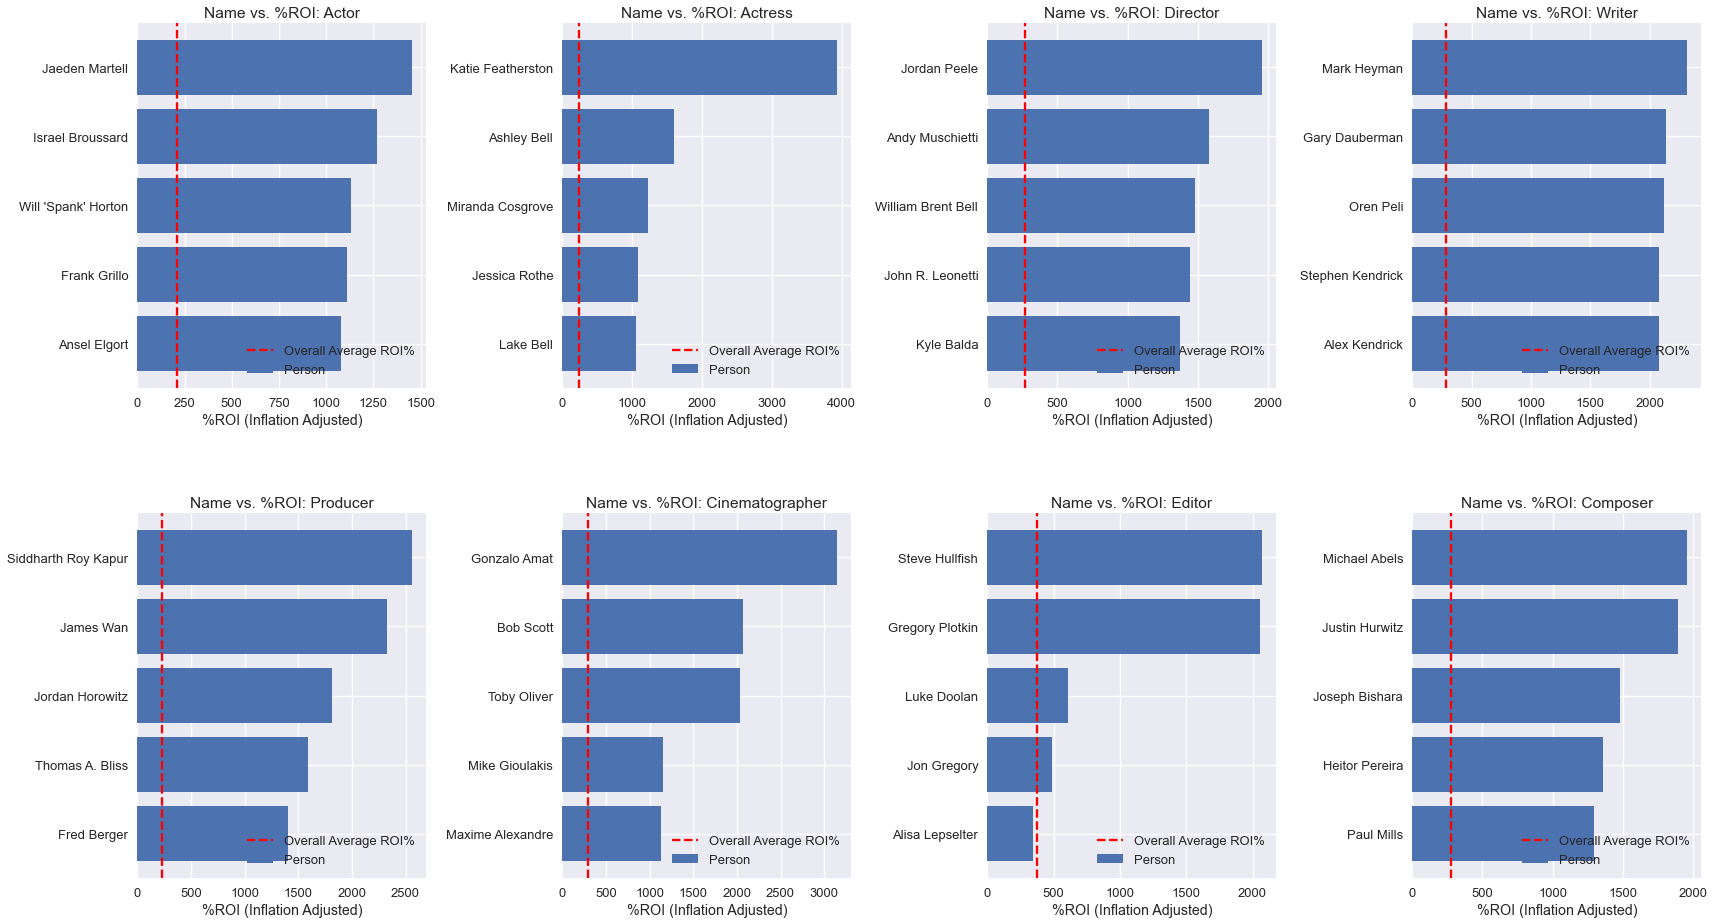

In [657]:
fig, ax = plt.subplots(2, 4, figsize=[25,15])
plt.tight_layout(pad=10)

for i,ppl in enumerate(pplorder):
    r = i//4
    c = i%4
    ax[r,c].barh(y=ppl_comp2T[ppl]['primary_name'],width=ppl_comp2T[ppl]['ROI_careertot%'], label='Person')
    ax[r,c].invert_yaxis()
    ax[r,c].axvline(ppl_comp2_avgs[f'{ppl}_%ROI_avg'], ls='--', color='red', label='Overall Average ROI%')
    ax[r,c].legend(loc='lower right')
    ax[r,c].set_xlabel('%ROI (Inflation Adjusted)')
    ax[r,c].set_title(f'Name vs. %ROI: {ppl.capitalize()}')
plt.savefig('peoplefigs/name_roi_bar_2plusmov.png')

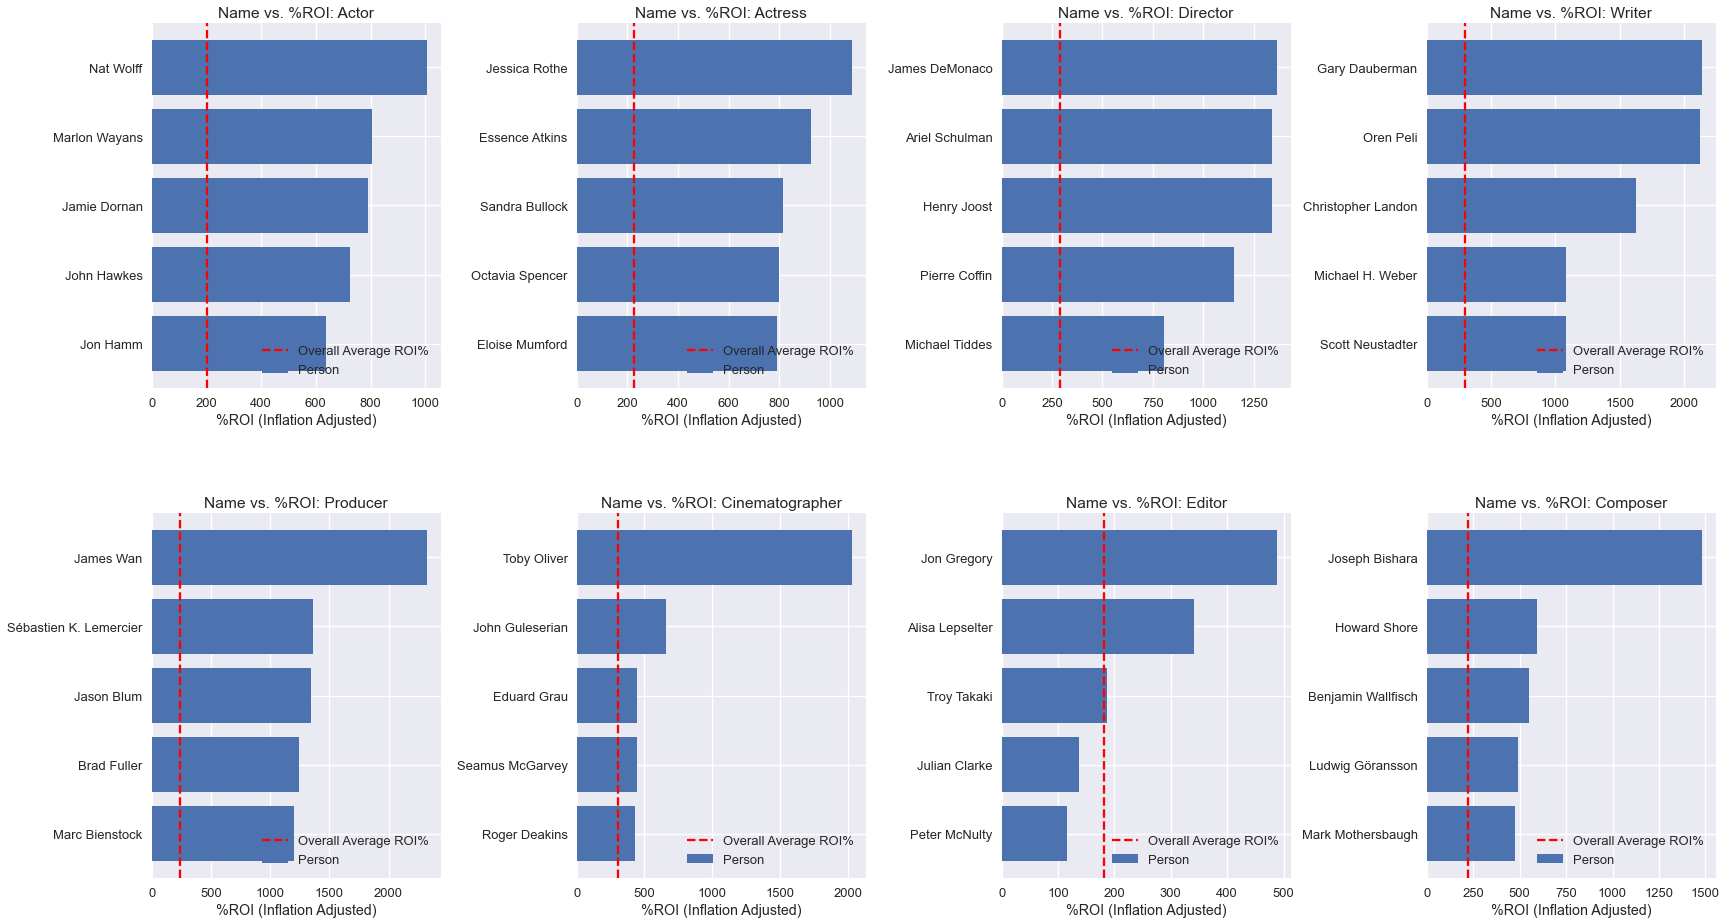

In [658]:
fig, ax = plt.subplots(2, 4, figsize=[25,15])
plt.tight_layout(pad=10)

for i,ppl in enumerate(pplorder):
    r = i//4
    c = i%4
    ax[r,c].barh(y=ppl_comp3T[ppl]['primary_name'],width=ppl_comp3T[ppl]['ROI_careertot%'], label='Person')
    ax[r,c].invert_yaxis()
    ax[r,c].axvline(ppl_comp3_avgs[f'{ppl}_%ROI_avg'], ls='--', color='red', label='Overall Average ROI%')
    ax[r,c].legend(loc='lower right')
    ax[r,c].set_xlabel('%ROI (Inflation Adjusted)')
    ax[r,c].set_title(f'Name vs. %ROI: {ppl.capitalize()}')
plt.savefig('peoplefigs/name_roi_bar_3plusmov.png')